# Exercise 10: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [1]:
# Read in Original Data Frames
lexical <- read.csv('LexicalData_withIncorrect.csv')
head(lexical)
item <- read.csv('Items.csv')
head(item)

# left_join
library(tidyverse)
lexical_v2 <- lexical %>% 
  left_join(dplyr::select(item, Word, Length, Log_Freq_HAL), by = c("D_Word" = "Word"))
head(lexical_v2)

# drop NAs
lexical_final <- drop_na(lexical_v2)
head(lexical_final)

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>
1,1,157,1,1,710,browse,false,-0.437,1
2,2,67,1,1,"1,094",refrigerant,false,0.825,1
3,3,120,1,1,587,gaining,false,-0.645,1
4,4,21,1,1,984,cheerless,false,0.025,1
5,5,236,1,1,577,pattered,false,-0.763,1
6,6,236,2,1,715,conjures,false,-0.364,1


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<chr>,<int>,<chr>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

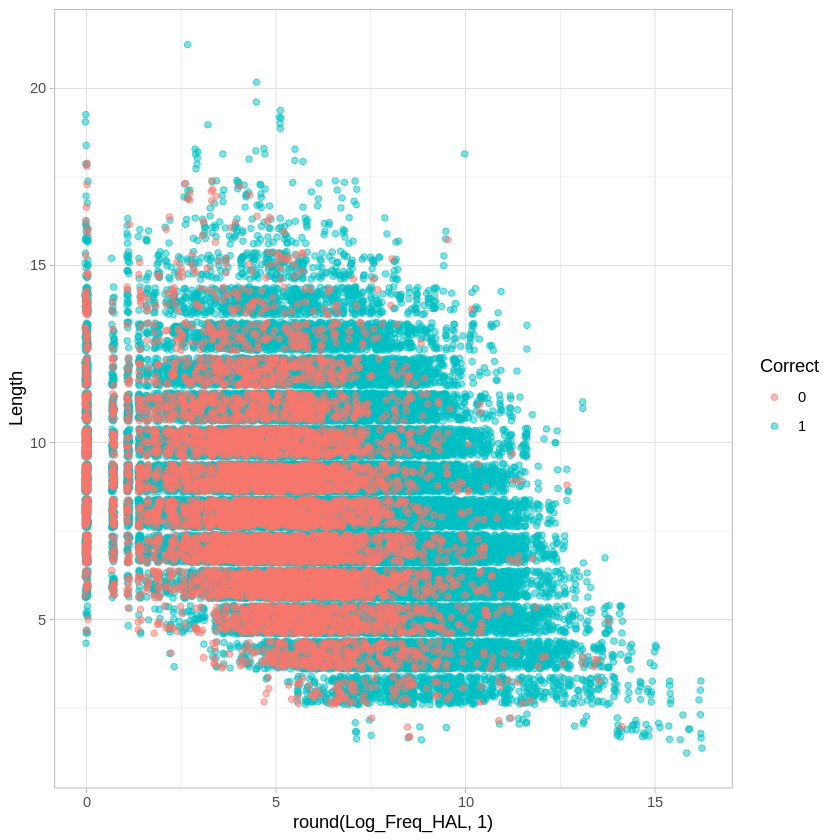

In [2]:
lexical_final$Correct <- as.factor(lexical_final$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(lexical_final,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 

What do you observe about the "Correct" and "Incorrect" clusters? 

> *The correct answers are color-coded in blue (1) and the incorrect answers are color-coded in red (0). Both clusters appear to have a slight negative relationship (i.e., more positive "Length" values with more negative "Log_Freq_HAL" values). The correct cluster is more expansive (from 0 to about 15 on the x-axis) and the incorrect cluster overlaps with the correct cluster, specifically on the lower and middle x-values (from 0 to about 10-ish, then the points become less dense closer to 15).*
> 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [3]:
# fitting logistic regression model
model1 = glm(Correct ~ Length*Log_Freq_HAL, data = lexical_final, family = binomial)
summary(model1)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = lexical_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

There is a significant main effect of Length (p < .001) where with a one unit increase in Length there is a log odds increase of 0.15 times for an average subject to correctly determine if a word is a real word or a not real word.

There is a significant main effect of Log_Freq_HAL (p < .001) where with a one unit increase in Log_Freq_HAL there is a log odds increase of 0.40 times for an average subject to correctly determine if a word is a real word or a not real word.

There is a significant interaction between Length and Log_Freq_HAL (p <. 001) where word Length on judgment accuracy (i.e., if a word is real or not) decreases with Log_Freq_HAL (estimate = -0.01).

The intercept is harder to interpret and not super informative. The intercept presumes that the log odds of a subject accurately deciding if a letter string is a word or not a word when the Length of the given word and Log_Freq_HAL are both equal to 0, which is impossible, but would equal -0.94.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [4]:
threshold = 0.50 #binarizing threshold 

# predicting trial correctness; need to have all the observations of the trials
nrow(lexical_final) # 70589 observations
num_observe = nrow(lexical_final) # store as a value

# make a dataframe/list for observations with predicted values
predict_df = data.frame(predict(model1, type = "response"))

## Renaming the predicted values generated above to "predicted_prob" 
colnames(predict_df) = c('predicted_prob')
head(predict_df)

# code incorrect responses as 0 and correct responses as 1
  # see tutorial for help
predict_df$predicted_binary=rep(0,num_observe)
head(predict_df) # code incorrect as 0
predict_df$predicted_binary[predict_df$predicted_prob>threshold]=1
head(predict_df) # code correct as 1

# confusion matrix
confusion1 = data.frame(predict_df$predicted_binary, lexical_final$Correct)
colnames(confusion1) = c('predicted', 'actual')
table(confusion1)

# We can calculate the prediction accuracy by counting the number of times our
# prediction vector matched the real data and taking the average (from tutorial)
print(paste("Accuracy:",mean(confusion1$predicted == confusion1$actual)))

[1] 70589

,predicted_prob
,<dbl>
1,0.9479784
2,0.8826628
3,0.9417677
4,0.7707288
5,0.6682356
6,0.8704362


,predicted_prob,predicted_binary
,<dbl>,<dbl>
1,0.9479784,0
2,0.8826628,0
3,0.9417677,0
4,0.7707288,0
5,0.6682356,0
6,0.8704362,0


,predicted_prob,predicted_binary
,<dbl>,<dbl>
1,0.9479784,1
2,0.8826628,1
3,0.9417677,1
4,0.7707288,1
5,0.6682356,1
6,0.8704362,1


         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not? 

> *The accuracy came out as 88.7%, which sounds really good in theory. Most of the correct observations were correctly classified (62566/[62566 + 44]): 99.9%. This was not the case for the incorrect observations. There's a huge false positive rate where the model is saying an observation is correct when it is actually incorrect (7966/[7766 + 13]) = 99.8%. of the time. The actual rate of the model correctly identifying an observation as incorrect is only about .2% (13/[7766 + 13]).*  
> 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [5]:
# load MASS
library(MASS)

# fit QDA model
model2 = qda(Correct ~ Length*Log_Freq_HAL, data=lexical_final)
model2 # print


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
qda(Correct ~ Length * Log_Freq_HAL, data = lexical_final)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [6]:
# make a dataframe/list for observations with predicted values, like above
qda_df = data.frame(predict(model2, type = "response"))
head(qda_df)

# code as 0/1 for probability; little different than above, store in new dataframe
qda_df %>% mutate(predicted_binary = if_else(posterior.1 >= threshold, 1, 0)) -> qda_df2

# now that everything's set up, make confusion matrix, like above
confusion2 = data.frame(qda_df2$predicted_binary, lexical_final$Correct)
colnames(confusion2) = c('predicted', 'actual')
table(confusion2)

# We can calculate the prediction accuracy by counting the number of times our
# prediction vector matched the real data and taking the average (like above)
print(paste("Accuracy:",mean(confusion2$predicted == confusion2$actual)))

,class,posterior.0,posterior.1
,<fct>,<dbl>,<dbl>
1,1,0.02842981,0.9715702
2,1,0.15567716,0.8443228
3,1,0.05352231,0.9464777
4,1,0.25641008,0.7435899
5,1,0.31449666,0.6855033
6,1,0.14651538,0.8534846


         actual
predicted     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> *The overall accuracies are very similar (QDA accuracy of 87.0% compared to logistic regression accuracy of 88.7%), but the QDA is slightly less accurate. The QDA did a good job of accurately identifying actually correct observations (60963/[60963 + 1647]) = 97.4%. As with the logistic regression, the QDA also has a lot of false positives (7524/[7534 + 455] = 94.3%) and is thus only accurately classifying incorrect responses as incorrect 5.7% (455/[7534 + 455])of the time. But 5.7% is better than .2%*

**DUE:** 5pm EST, March 20, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*